In [1]:
import pandas as p
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
import numpy as np
import matplotlib.pyplot as m
import seaborn as s


In [4]:
data=p.read_csv('dataset/payroll_prediction/train-test-payroll.csv')

In [5]:
data

,REGULAR_PAY,PAY_YEAR,DEPARTMENT_NO,JOB_CLASS_PGRADE,JOB_TITLE,OVERTIME_PAY,ALL_OTHER_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY
0,55725.24,2017,98,3156,0,4785.05,2021.84,3678.00,23508.90,0,0
1,139174.88,2017,98,9105,1,16340.50,6170.49,9186.00,23508.90,0,1
2,245879.12,2017,98,9602,2,0.00,12504.30,16228.00,23508.90,1,2
3,101494.34,2017,98,5885,3,7824.99,12630.52,6699.00,23508.90,1,1
4,101345.12,2017,98,3841,4,22284.37,1566.75,6689.00,23508.90,1,0
...,...,...,...,...,...,...,...,...,...,...,...
336534,100406.40,2022,12,597,446,0.00,0.00,29780.54,10521.00,1,7
336535,69062.40,2022,42,9485,390,0.00,9193.85,20483.91,10317.36,1,0
336536,32927.90,2022,4,3181,416,4855.63,2533.37,9766.42,4166.52,1,3
336537,39156.66,2022,70,2214,189,4978.06,3480.00,17918.27,7793.89,1,7


In [6]:
data.isnull().sum()

REGULAR_PAY                      0
PAY_YEAR                         0
DEPARTMENT_NO                    0
JOB_CLASS_PGRADE                 0
JOB_TITLE                        0
OVERTIME_PAY                     0
ALL_OTHER_PAY                    0
CITY_RETIREMENT_CONTRIBUTIONS    0
BENEFIT_PAY                      0
GENDER                           0
ETHNICITY                        0
dtype: int64

In [7]:
data.describe()

,REGULAR_PAY,PAY_YEAR,DEPARTMENT_NO,JOB_CLASS_PGRADE,JOB_TITLE,OVERTIME_PAY,ALL_OTHER_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY
count,336539.000000,336539.000000,336539.000000,336539.00000,336539.000000,336539.000000,3.365390e+05,336539.000000,336539.000000,336539.000000,336539.000000
mean,83867.947440,2018.189598,67.144236,3301.92635,406.900422,13425.436662,5.365369e+03,23968.574407,13637.585906,0.732813,2.171086
std,38335.586522,2.712597,29.245627,2118.61935,357.019840,23660.621132,9.987850e+03,19194.292105,6851.135324,0.442512,2.355145
min,0.000000,2013.000000,2.000000,1.00000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,57994.520000,2016.000000,42.000000,2112.00000,186.000000,0.000000,1.269695e+03,7213.405000,8262.240000,0.000000,0.000000
50%,83458.680000,2019.000000,70.000000,2227.00000,354.000000,3624.680000,2.785060e+03,19780.870000,15282.500000,1.000000,2.000000
75%,108923.400000,2020.000000,98.000000,3828.00000,490.000000,16469.530000,6.356505e+03,36683.775000,18495.320000,1.000000,3.000000
max,434340.640000,2022.000000,98.000000,9998.00000,1757.000000,434393.940000,2.394972e+06,164256.850000,58786.030000,2.000000,14.000000


In [8]:
data['TOTAL_PAY'] = (
    data['REGULAR_PAY'] +
    data['OVERTIME_PAY'] +
    data['ALL_OTHER_PAY'])


In [9]:
y=data['TOTAL_PAY']
x=data.drop(['TOTAL_PAY',
    'REGULAR_PAY',
    'OVERTIME_PAY',
    'ALL_OTHER_PAY',
    'JOB_CLASS_PGRADE',
    'PAY_YEAR'
    ],axis=1)
data.drop([
    'REGULAR_PAY',
    'OVERTIME_PAY',
    'ALL_OTHER_PAY'
    ,
    'JOB_CLASS_PGRADE',
    'PAY_YEAR'],axis=1,inplace=True)

In [10]:
x

,DEPARTMENT_NO,JOB_TITLE,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY
0,98,0,3678.00,23508.90,0,0
1,98,1,9186.00,23508.90,0,1
2,98,2,16228.00,23508.90,1,2
3,98,3,6699.00,23508.90,1,1
4,98,4,6689.00,23508.90,1,0
...,...,...,...,...,...,...
336534,12,446,29780.54,10521.00,1,7
336535,42,390,20483.91,10317.36,1,0
336536,4,416,9766.42,4166.52,1,3
336537,70,189,17918.27,7793.89,1,7


In [11]:
y

0          62532.13
1         161685.87
2         258383.42
3         121949.85
4         125196.24
            ...    
336534    100406.40
336535     78256.25
336536     40316.90
336537     47614.72
336538     49567.91
Name: TOTAL_PAY, Length: 336539, dtype: float64

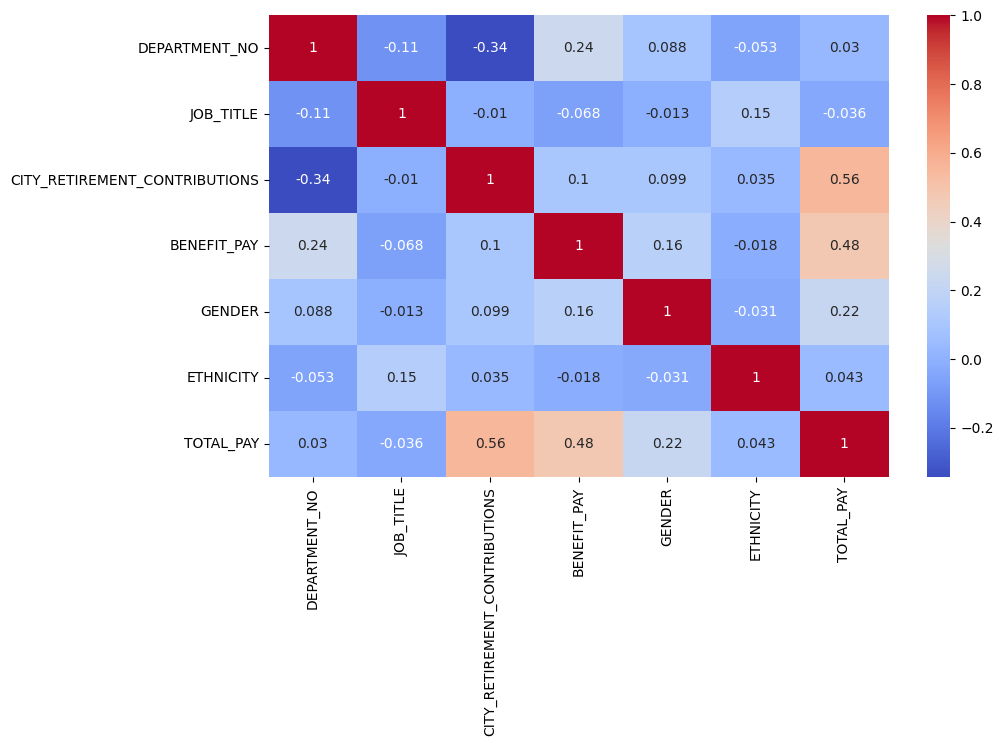

In [12]:
corr = data.corr()
m.figure(figsize=(10,6))
s.heatmap(corr, annot=True, cmap='coolwarm')
m.show()


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [14]:
y_train.describe()

count    2.692310e+05
mean     1.027204e+05
std      5.335273e+04
min      0.000000e+00
25%      6.618622e+04
50%      9.892508e+04
75%      1.314592e+05
max      2.394972e+06
Name: TOTAL_PAY, dtype: float64

In [15]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)


In [16]:

numeric_features = ['CITY_RETIREMENT_CONTRIBUTIONS', 'BENEFIT_PAY']

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])


In [17]:
y_train_log

154942    11.932777
223475     8.490845
148447    11.877258
16145      9.124577
12345     11.947576
            ...    
119879    11.828788
259178    11.008471
131932    11.733883
146867    12.341105
121958    11.406986
Name: TOTAL_PAY, Length: 269231, dtype: float64

In [18]:
categorical_features = ['DEPARTMENT_NO', 'JOB_TITLE', 'GENDER', 'ETHNICITY']

model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    cat_features=categorical_features,
    verbose=100
)

# Fit on training data
model.fit(X_train, y_train_log, eval_set=(X_test, y_test_log), use_best_model=True)


0:	learn: 0.6675204	test: 0.6602217	best: 0.6602217 (0)	total: 104ms	remaining: 1m 43s
100:	learn: 0.2259156	test: 0.2219203	best: 0.2219203 (100)	total: 4.28s	remaining: 38.1s
200:	learn: 0.2147988	test: 0.2135216	best: 0.2135216 (200)	total: 8.53s	remaining: 33.9s
300:	learn: 0.2102162	test: 0.2103565	best: 0.2103565 (300)	total: 12.8s	remaining: 29.6s
400:	learn: 0.2072705	test: 0.2086745	best: 0.2085996 (399)	total: 16.9s	remaining: 25.3s
500:	learn: 0.2050470	test: 0.2076040	best: 0.2076040 (500)	total: 20.8s	remaining: 20.7s
600:	learn: 0.2033579	test: 0.2069409	best: 0.2069407 (599)	total: 25.1s	remaining: 16.7s
700:	learn: 0.2015045	test: 0.2060154	best: 0.2060119 (699)	total: 29.5s	remaining: 12.6s
800:	learn: 0.1999709	test: 0.2055300	best: 0.2054700 (790)	total: 34s	remaining: 8.44s
900:	learn: 0.1983110	test: 0.2050479	best: 0.2050479 (900)	total: 38.3s	remaining: 4.2s
999:	learn: 0.1971896	test: 0.2044691	best: 0.2044633 (998)	total: 42.6s	remaining: 0us

bestTest = 0.2044

In [21]:
y_pred_log = model.predict(X_test)         
y_pred = np.expm1(y_pred_log) 

In [22]:

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
rmsle = np.sqrt(np.mean((np.log1p(y_test) - np.log1p(y_pred))**2))

print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R²: {r2:.3f}")
print(f"Median Absolute Error: ${medae:,.2f}")
print(f"RMSLE: {rmsle:.3f}")


MAE: $11,012.39
RMSE: $19,094.08
R²: 0.871
Median Absolute Error: $5,917.53
RMSLE: 0.204


/tmp/ipykernel_4938/2091031600.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s.barplot(x=metrics, y=values, palette="viridis")


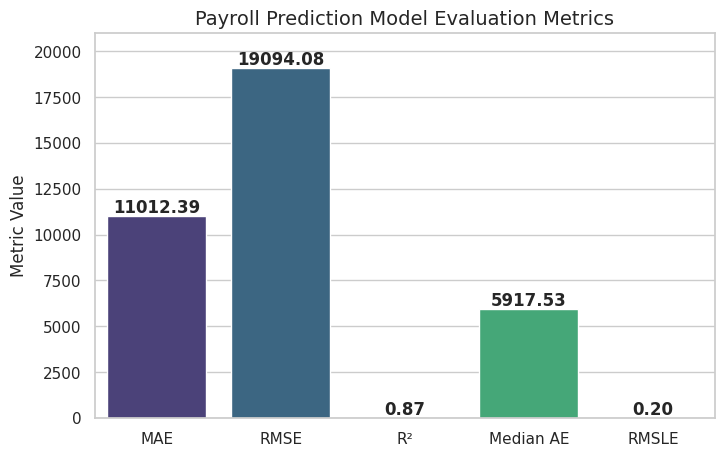

In [23]:

metrics = ['MAE', 'RMSE', 'R²', 'Median AE', 'RMSLE']
values = [mae, rmse, r2, medae, rmsle]

s.set(style="whitegrid")

m.figure(figsize=(8,5))
s.barplot(x=metrics, y=values, palette="viridis")

for i, v in enumerate(values):
    m.text(i, v + max(values)*0.01, f"{v:.2f}", ha='center', fontweight='bold')

m.title("Payroll Prediction Model Evaluation Metrics", fontsize=14)
m.ylabel("Metric Value")
m.ylim(0, max(values)*1.1)
m.show()


In [25]:
m.savefig("images/payroll_metrics.png")


<Figure size 640x480 with 0 Axes>